<a href="https://colab.research.google.com/github/cewatkins/colab1/blob/master/Copy_of_Copy_of_Spreads_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from urllib.request import urlretrieve

URL1 = 'https://www.kaggle.com/tobycrabtree/nfl-scores-and-betting-data/downloads/spreadspoke_scores.csv/12'
urlretrieve(URL1, 'spreads.csv')
df=pd.read_csv('spreads.csv', parse_dates=True, index_col='schedule_date')
#df = pd.read_csv('/Users/eric/Documents/spreadspoke_scores.csv', parse_dates=True, index_col='schedule_date')
df = df[['schedule_season', 'schedule_week','schedule_playoff','team_home','score_home','team_away','score_away','team_favorite_id','spread_favorite','over_under_line']]
df = df['2010-09-01': '2019-09-13'].dropna()
#df = df[df['spread_favorite'] < -18]
df['team_home'] = df['team_home'].map({
'ARI' : 'Arizona Cardinals',
'Atlanta Falcons' : 'ATL',
'Baltimore Ravens' : 'BAL',
'Buffalo Bills' : 'BUF',
'Carolina Panthers' : 'CAR',
'Chicago Bears' : 'CHI',
'Cincinnati Bengals' : 'CIN',
'Cleveland Browns' : 'CLE',
'Dallas Cowboys' : 'DAL',
'Denver Broncos' : 'DEN',
'Detroit Lions' : 'DET',
'Green Bay Packers' : 'GB',
'Houston Texans' : 'HOU',
'Indianapolis Colts' : 'IND',
'Jacksonville Jaguars' : 'JAX',
'Kansas City Chiefs' : 'KC',
'Los Angeles Chargers' : 'LAC',
'Los Angeles Rams' : 'LAR',
'Miami Dolphins' : 'MIA',
'Minnesota Vikings' : 'MIN',
'New England Patriots' : 'NE',
'New Orleans Saints' : 'NO',
'New York Giants' : 'NYG',
'New York Jets' : 'NYJ',
'Oakland Raiders' : 'OAK',
'Philadelphia Eagles' : 'PHI',
'Pittsburgh Steelers' : 'PIT',
'Seattle Seahawks' : 'SEA',
'San Francisco 49ers' : 'SF',
'Tampa Bay Buccaneers' : 'TB',
'Tennessee Titans' : 'TEN',
'Washington Redskins' : 'WAS'})

df['team_away'] = df['team_away'].map({
'ARI' : 'Arizona Cardinals',
'Atlanta Falcons' : 'ATL',
'Baltimore Ravens' : 'BAL',
'Buffalo Bills' : 'BUF',
'Carolina Panthers' : 'CAR',
'Chicago Bears' : 'CHI',
'Cincinnati Bengals' : 'CIN',
'Cleveland Browns' : 'CLE',
'Dallas Cowboys' : 'DAL',
'Denver Broncos' : 'DEN',
'Detroit Lions' : 'DET',
'Green Bay Packers' : 'GB',
'Houston Texans' : 'HOU',
'Indianapolis Colts' : 'IND',
'Jacksonville Jaguars' : 'JAX',
'Kansas City Chiefs' : 'KC',
'Los Angeles Chargers' : 'LAC',
'Los Angeles Rams' : 'LAR',
'Miami Dolphins' : 'MIA',
'Minnesota Vikings' : 'MIN',
'New England Patriots' : 'NE',
'New Orleans Saints' : 'NO',
'New York Giants' : 'NYG',
'New York Jets' : 'NYJ',
'Oakland Raiders' : 'OAK',
'Philadelphia Eagles' : 'PHI',
'Pittsburgh Steelers' : 'PIT',
'Seattle Seahawks' : 'SEA',
'San Francisco 49ers' : 'SF',
'Tampa Bay Buccaneers' : 'TB',
'Tennessee Titans' : 'TEN',
'Washington Redskins' : 'WAS'})

df['home_favorite'] = df['team_home'] == df['team_favorite_id']
df['away_favorite'] = df['team_away'] == df['team_favorite_id']
df['score_favorite'] = (df['home_favorite'] * df['score_home']) + (df['away_favorite'] * df['score_away'])
df['score_dog'] = df['score_home'] + df['score_away'] - df['score_favorite']
df['dog wins'] = df['score_dog'] > df['score_favorite']
df['favorite_point_diff'] = -(df['score_favorite'] - df['score_dog'])
df['favorite_team_cover'] = df['favorite_point_diff'] < df['spread_favorite']

df = df.groupby('spread_favorite').agg({'schedule_season':'count','favorite_team_cover':'sum','dog wins':'sum'})
df.columns = ['total games','favorite covered', 'upsets']
df['% covered'] = df['favorite covered'] / df['total games']
df['% upset'] = df['upsets'] / df['total games']
df['win no cover'] = 1-df['% covered'] - df['% upset']
df.sort_values(by=['spread_favorite'], ascending=False)

#df = df.groupby('team_favorite_id').agg({'spread_favorite': 'mean', 'team_favorite_id':'count', 'favorite_team_cover': 'sum'})
#df.columns = ['avg spread as favorite','# games favored','# covers']
#df['% of favored games covered'] = df['# covers'] / df['# games favored']
#df.sort_values(by=['% of favored games covered'], ascending=False)

ValueError: ignored

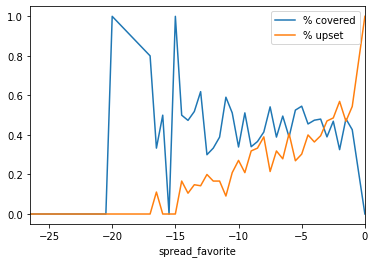

In [0]:
%matplotlib inline

#df['% covered'].hist()
df[['% covered', '% upset']].plot()